In [1]:
import os, sys
current = os.path.dirname(os.path.realpath('__file__'))
parent = os.path.dirname(current)
sys.path.append(parent)

import math
import copy
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from scipy.stats import pearsonr

from helpers import *  

### Question 4a

In [2]:
def compute_degree_centrality(undigraph):
    """Takes an undirected graph and computes the degree centrality for the nodes in the graph. 
    Returns a dictionary with the same set of keys (nodes) and their degree centrality."""
    return compute_degrees(undigraph)

def compute_closeness_centrality(undigraph):
    """Takes an undirected graph and computes the closeness centrality for the nodes in the graph. 
    Returns a dictionary with the same set of keys (nodes) and their closeness centrality."""
    g = nx.Graph(undigraph)
    return nx.closeness_centrality(g)

def compute_relatedness_index(undigraph, centrality):
    """Takes an undirected graph and computes the relatedness index for the nodes in the graph. 
    Returns a dictionary with the same set of keys (nodes) and their relatedness index."""
    g = nx.Graph(undigraph)
    x, y = [], []

    for u in undigraph:
        for v in undigraph[u]:
            x.append(centrality[u])
            y.append(centrality[v])

    return pearsonr(x, y)

In [3]:
karate = {node: nx.read_gml(parent + "/networks/karate.gml")[node] for node in nx.read_gml(parent + "/networks/karate.gml")}
degree_centrality = compute_degree_centrality(karate)
relatedness_index = compute_relatedness_index(karate, degree_centrality)
print(f'relatedness index of degree centrality {relatedness_index[0]:.3f} with p value {relatedness_index[1]:.3f}')
closeness_centrality = compute_closeness_centrality(karate)
relatedness_index = compute_relatedness_index(karate, closeness_centrality)
print(f'relatedness index of closeness centrality {relatedness_index[0]:.3f} with p value {relatedness_index[1]:.3f} \n')

relatedness index of degree centrality -0.476 with p value 0.000
relatedness index of closeness centrality -0.082 with p value 0.312 



### Question 4b

In [4]:
def network_analysis(network, name):
    """Prints relatedness index for degree and closeness centrality.
    Plots degree and local clustering coefficienct distributions"""
    print(name)
    
    degree_centrality = compute_degree_centrality(network)
    relatedness_index = compute_relatedness_index(network, degree_centrality)
    print(f'relatedness index of degree centrality {relatedness_index[0]:.3f} with p value {relatedness_index[1]:.3f}')
    closeness_centrality = compute_closeness_centrality(network)
    relatedness_index = compute_relatedness_index(network, closeness_centrality)
    print(f'relatedness index of closeness centrality {relatedness_index[0]:.3f} with p value {relatedness_index[1]:.3f} \n')

    plt.hist(degree_centrality.values(), bins=100, weights=np.ones(len(network))/len(network))
    plt.title(f'Degree Centrality Distribution of {name} Graph')
    plt.xlabel('Degree Centrality')
    plt.ylabel('Percentage')
    plt.show()

    plt.hist(closeness_centrality.values(), bins=100, weights=np.ones(len(network))/len(network))
    plt.title(f'Closeness Centrality Distribution of {name} Graph')
    plt.xlabel('Closeness Centrality')
    plt.ylabel('Percentage')
    plt.show()

    neighbourhoods = compute_neighbourhoods(network)
    clustering_coefficients = compute_local_clustering_coefficients(network, neighbourhoods, rounding=False)
    plt.hist(clustering_coefficients.values(), bins=100, weights=np.ones(len(network))/len(network))
    plt.title(f'Clustering Coefficient Distribution of {name} Graph')
    plt.xlabel('Clustering Coefficient')
    plt.ylabel('Percentage')
    plt.show()

GNP
relatedness index of degree centrality -0.003 with p value 0.016
relatedness index of closeness centrality -0.003 with p value 0.016 



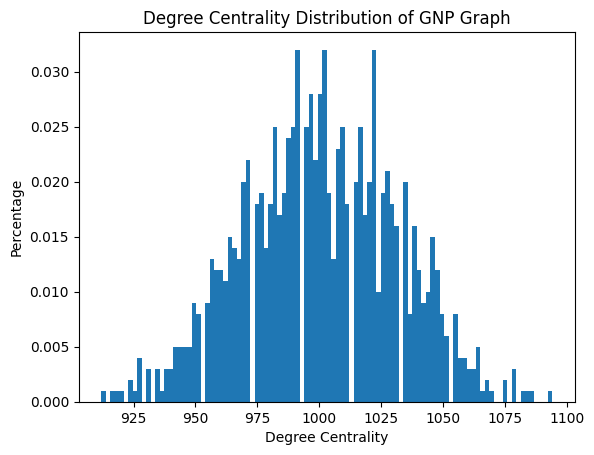

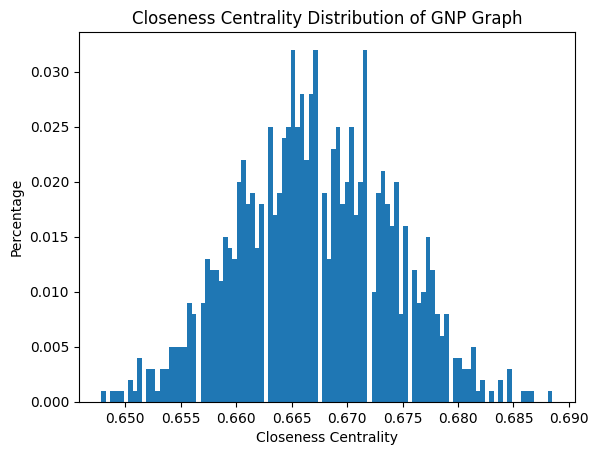

100%|██████████| 1000/1000 [01:39<00:00, 10.00it/s]


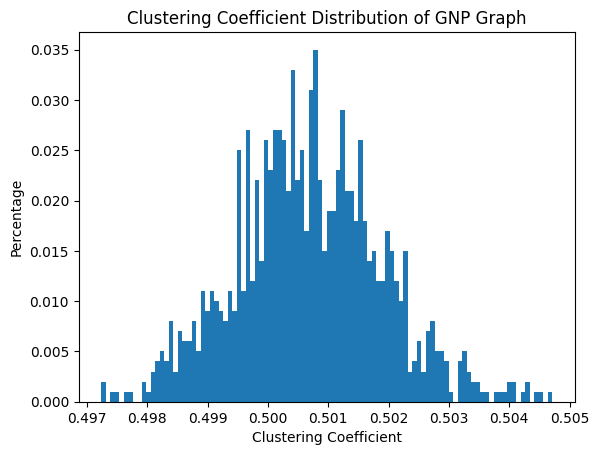

GNM
relatedness index of degree centrality 0.001 with p value 0.900
relatedness index of closeness centrality 0.175 with p value 0.000 



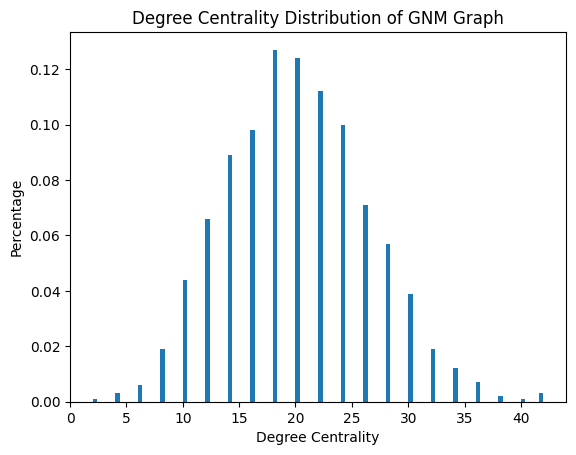

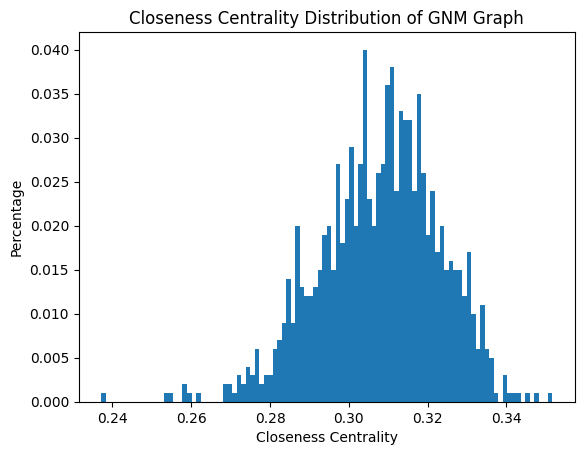

100%|██████████| 1000/1000 [00:00<00:00, 20834.12it/s]


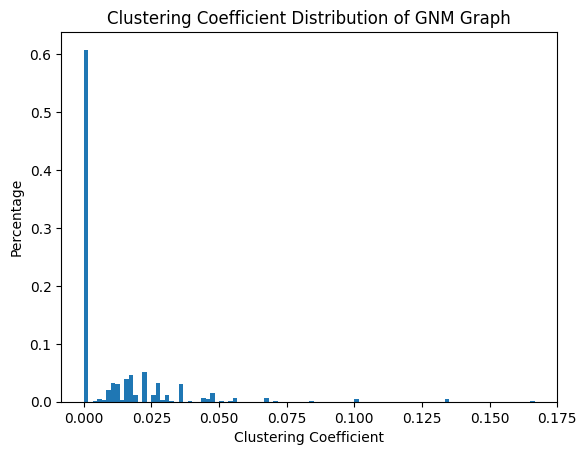

WS
relatedness index of degree centrality 0.011 with p value 0.001
relatedness index of closeness centrality 0.014 with p value 0.000 



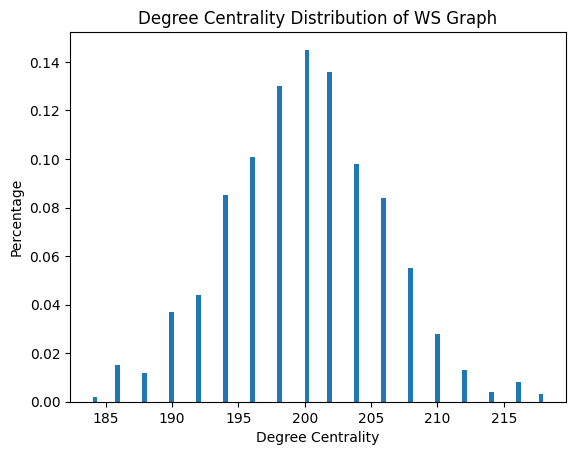

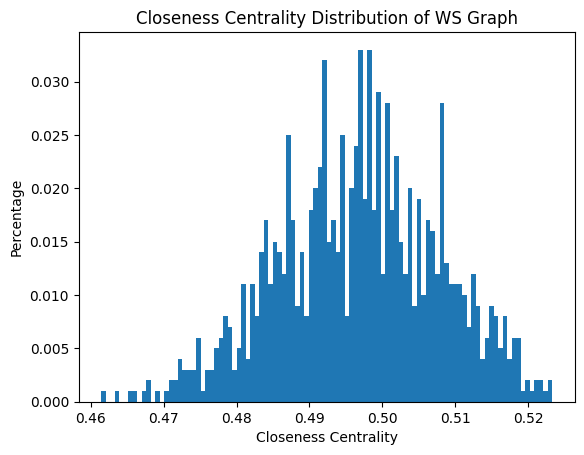

100%|██████████| 1000/1000 [00:04<00:00, 223.65it/s]


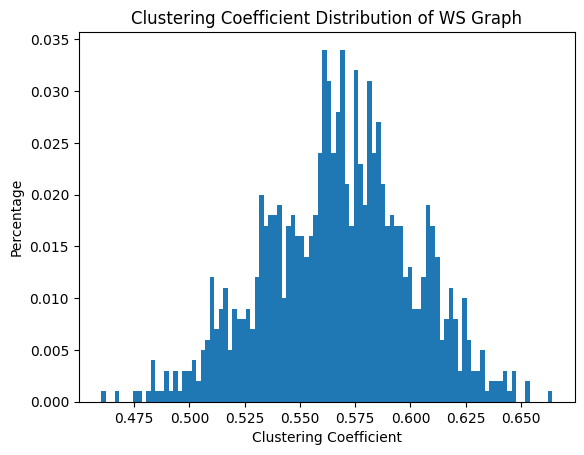

Karate
relatedness index of degree centrality -0.476 with p value 0.000
relatedness index of closeness centrality -0.082 with p value 0.312 



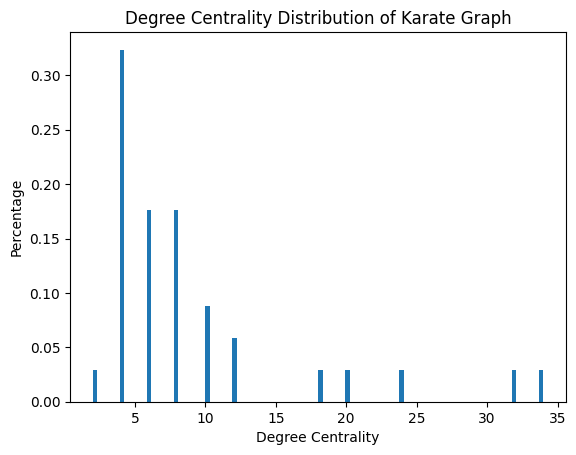

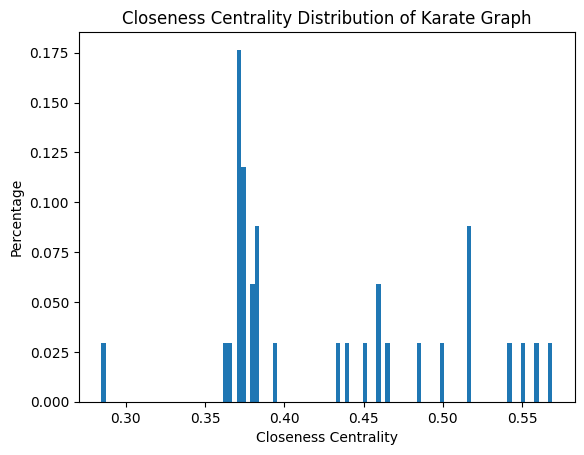

100%|██████████| 34/34 [00:00<?, ?it/s]


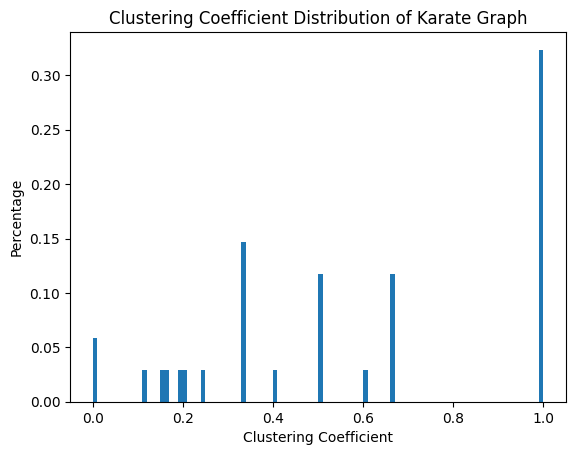

Football
relatedness index of degree centrality 0.162 with p value 0.000
relatedness index of closeness centrality 0.306 with p value 0.000 



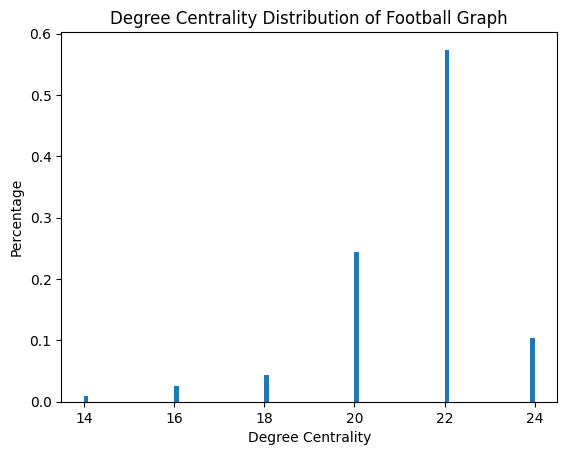

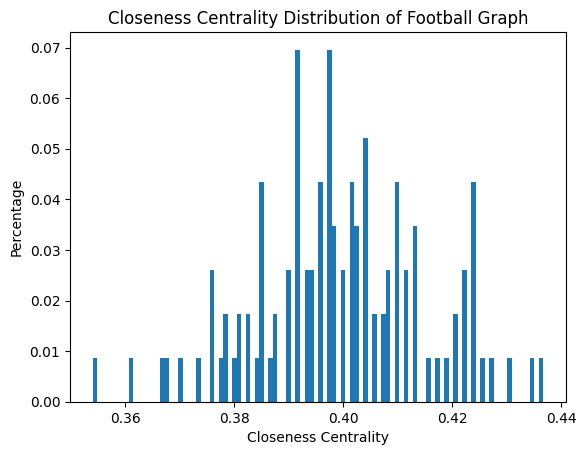

100%|██████████| 115/115 [00:00<00:00, 28731.53it/s]


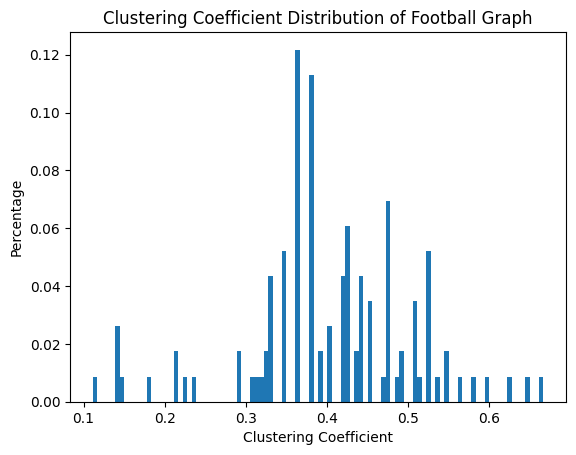

Words
relatedness index of degree centrality 0.649 with p value 0.000
relatedness index of closeness centrality 0.970 with p value 0.000 



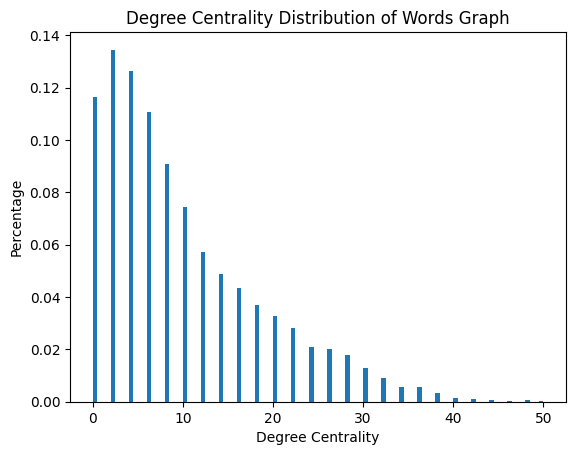

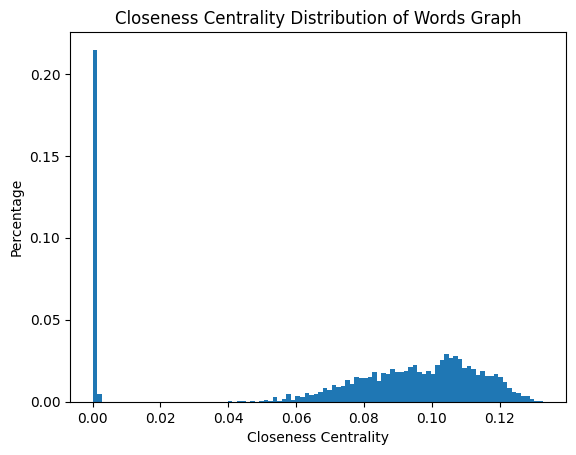

100%|██████████| 5757/5757 [00:00<00:00, 32709.94it/s]


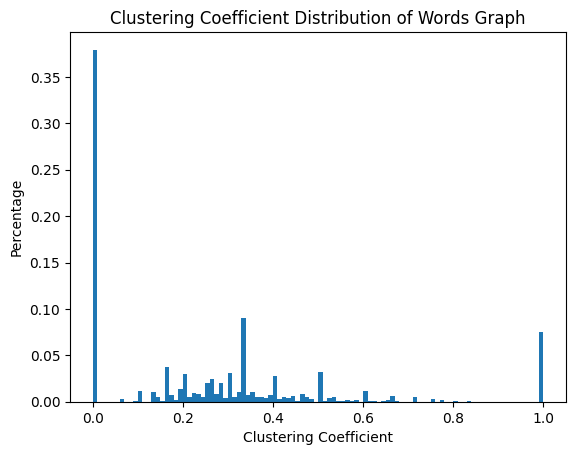

In [5]:
# Network Models
G = nx.gnp_random_graph(1000, 0.5)
gnp_graph = {node: set(G[node]) for node in G}
network_analysis(gnp_graph, 'GNP')

G = nx.gnm_random_graph(1000, 5000)
gnm_graph = {node: set(G[node]) for node in G}
network_analysis(gnm_graph, 'GNM')

G = make_ws_graph(1000, 50, 0.1)
ws_graph = {node: set(G[node]) for node in G}
network_analysis(ws_graph, 'WS')


# Real Networks
G = nx.read_gml(parent + "/networks/karate.gml")
karate = {node: set(G[node]) for node in G}
network_analysis(karate, 'Karate')

G = nx.read_gml(parent + "/networks/football.gml")
football = {node: set(G[node]) for node in G}
network_analysis(football, 'Football')

G = words_graph(parent + "/networks/words_dat.txt.gz")
words = {node: set(G[node]) for node in G}
network_analysis(words, 'Words')